In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gw35 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/gw35.csv")

In [3]:
gw35 = gw35[["name", "position", "team", "total_points"]]
gw35 = gw35.rename(columns={"total_points":"week_points"})
sum(gw35["week_points"])

874

### Performance Analysis

In [4]:
gw35_live_data = pd.read_excel("FPL results.xlsx")

In [5]:
gw35_live_data["Type"] = gw35_live_data["Type"].replace(["Random", "Quantum", "Classical"], ["FPL Auto-Pick", "Quantum Annealing", "Simulated Annealing"])

In [6]:
gw35_live_data

,Type,Points,Points (w/Captaincy)
0,Quantum Annealing,51.0,53.0
1,Simulated Annealing,39.0,41.0
2,FPL Auto-Pick,36.0,49.0


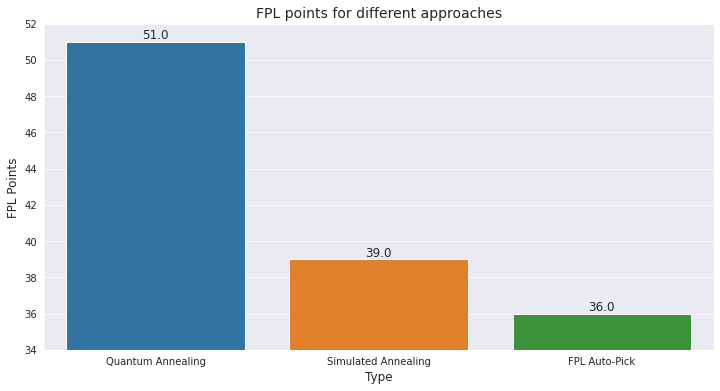

In [7]:
plt.figure(figsize=(12,6))

plt.title("FPL points for different approaches", fontsize=14)
ax = sns.barplot(data = gw35_live_data, x="Type", y="Points")
ax.bar_label(ax.containers[0], labels=gw35_live_data["Points"], fontsize=12)
plt.xlabel("Type", fontsize=12)
plt.ylabel("FPL Points", fontsize=12)
plt.ylim(34, 52)
plt.savefig("results/gw35_live_barchart.png")
plt.show();

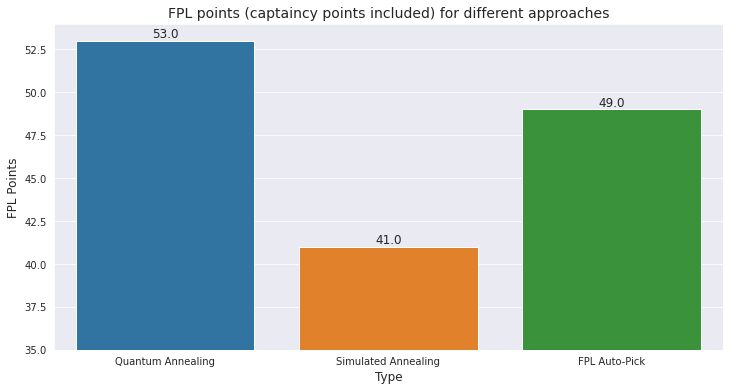

In [8]:
plt.figure(figsize=(12,6))

plt.title("FPL points (captaincy points included) for different approaches", fontsize=14)
ax = sns.barplot(data = gw35_live_data, x="Type", y="Points (w/Captaincy)")
ax.bar_label(ax.containers[0], labels=gw35_live_data["Points (w/Captaincy)"], fontsize=12)
plt.xlabel("Type", fontsize=12)
plt.ylabel("FPL Points", fontsize=12)
plt.ylim(35, 54)
plt.savefig("results/gw35_live_barchart_captaincy.png")
plt.show();

In [10]:
gw35_list_classical = os.listdir("gw35_exp_classical_100")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_100/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical["type"] = "classical_100"

In [11]:
gw35_list_classical_1000 = os.listdir("gw35_exp_classical_1000")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical_1000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_1000/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_1000 = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical_1000["type"] = "classical_1000"

In [12]:
gw35_list_classical_10000 = os.listdir("gw35_exp_classical_10000")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical_10000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_10000/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_10000 = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical_10000["type"] = "classical_10000"

In [13]:
gw35_list_quantum = os.listdir("gw35_exp_quantum")
df = pd.DataFrame()
count = 1
for data in gw35_list_quantum:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_quantum/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_quantum = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_quantum["type"] = "quantum"

In [14]:
tot_df = pd.concat([df_grouped_classical, df_grouped_classical_1000, df_grouped_classical_10000, df_grouped_quantum], axis = 0).reset_index(drop=True)

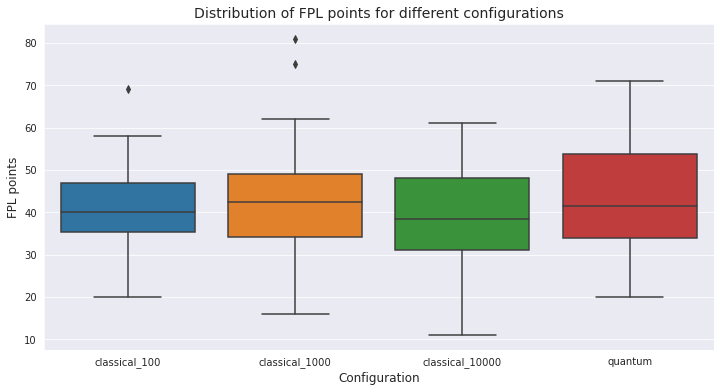

In [15]:
plt.figure(figsize=(12,6))
plt.title("Distribution of FPL points for different configurations", fontsize=14)
sns.boxplot(x = "type", y = "week_points", data = tot_df)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("FPL points", fontsize=12)
plt.savefig("results/gw35_boxplot.png")
plt.show();

In [16]:
tot_df.groupby("type")["week_points"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
classical_100,50.0,41.04,9.764492,20.0,35.25,40.0,47.00,69.0
classical_1000,50.0,43.36,12.888470,16.0,34.25,42.5,49.00,81.0
classical_10000,50.0,39.46,11.306870,11.0,31.00,38.5,48.00,61.0
quantum,50.0,43.82,13.205889,20.0,34.00,41.5,53.75,71.0


In [17]:
tot_mean = tot_df.groupby("type", as_index=False)["week_points"].mean()
tot_mean

,type,week_points
0,classical_100,41.04
1,classical_1000,43.36
2,classical_10000,39.46
3,quantum,43.82


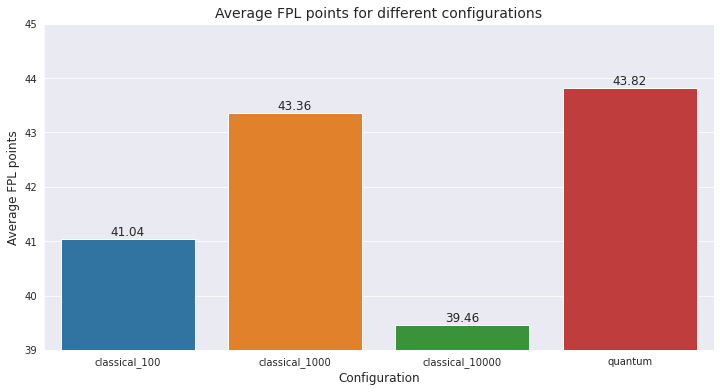

In [18]:
plt.figure(figsize=(12,6))
#sns.barplot(x = "type", y = "week_points", data = tot_mean)
plt.title("Average FPL points for different configurations", fontsize=14)
ax = sns.barplot(x = "type", y = "week_points", data = tot_mean)
ax.bar_label(ax.containers[0], labels=tot_mean['week_points'], fontsize=12)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("Average FPL points", fontsize=12)
plt.ylim(39, 45)
plt.savefig("results/gw35_barchart.png")
plt.show();

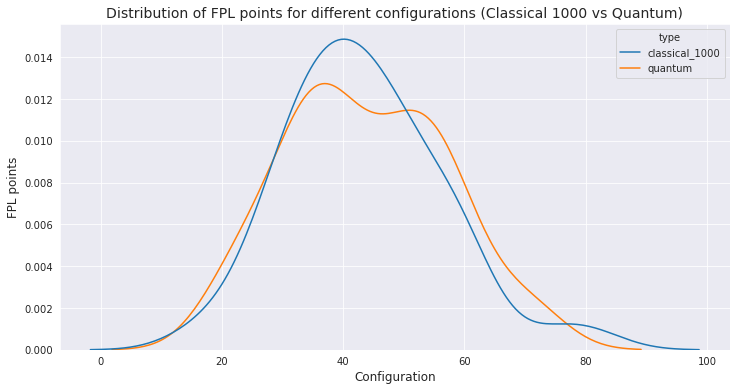

In [19]:
tot_df_use = tot_df[tot_df["type"].isin(["classical_1000", "quantum"])]
plt.figure(figsize=(12,6))
plt.title("Distribution of FPL points for different configurations (Classical 1000 vs Quantum)", fontsize=14)
sns.kdeplot(x = "week_points", data = tot_df_use, hue="type")
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("FPL points", fontsize=12)
plt.savefig("results/gw35_kdeplot_classical_1000_quantum.png")
plt.show();

In [20]:
classical_1000 = tot_df[tot_df["type"].isin(["classical_1000"])]
quantum = tot_df[tot_df["type"].isin(["quantum"])]

### Runtime Analysis

In [21]:
gw35_list_classical = os.listdir("gw35_exp_classical_100")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_100/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical["type"] = "classical_100"

In [22]:
gw35_list_classical_1000 = os.listdir("gw35_exp_classical_1000")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical_1000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_1000/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_1000 = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical_1000["type"] = "classical_1000"

In [23]:
gw35_list_classical_10000 = os.listdir("gw35_exp_classical_10000")
df = pd.DataFrame()
count = 1
for data in gw35_list_classical_10000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_classical_10000/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_10000 = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical_10000["type"] = "classical_10000"

In [24]:
gw35_list_quantum = os.listdir("gw35_exp_quantum")
df = pd.DataFrame()
count = 1
for data in gw35_list_quantum:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw35_exp_quantum/" + data)
        new_df = new_df.merge(gw35, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 35
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_quantum = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_quantum["type"] = "quantum"

In [25]:
tot_df = pd.concat([df_grouped_classical, df_grouped_classical_1000, df_grouped_classical_10000, df_grouped_quantum], axis = 0).reset_index(drop=True)

In [26]:
tot_elapsed = tot_df.groupby("type", as_index=False)["elapsed"].mean().sort_values("elapsed")

In [27]:
#tot_elapsed["log_elapsed"] = np.log(tot_elapsed["elapsed"])
tot_elapsed.sort_values("elapsed")

,type,elapsed
0,classical_100,0.308348
1,classical_1000,3.020025
3,quantum,3.693665
2,classical_10000,30.569354


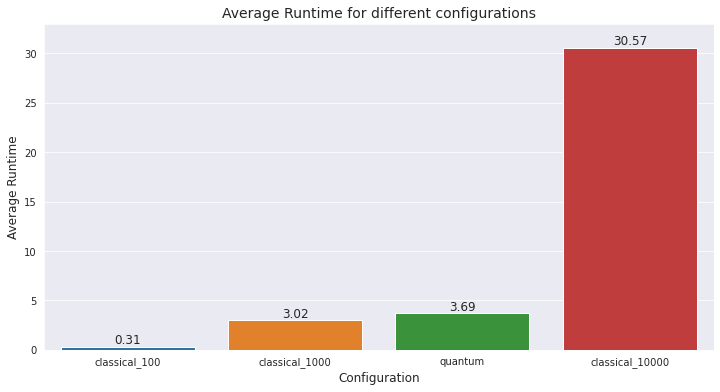

In [28]:
plt.figure(figsize=(12,6))
#sns.barplot(x = "type", y = "week_points", data = tot_mean)
plt.title("Average Runtime for different configurations", fontsize=14)
ax = sns.barplot(x = "type", y = "elapsed", data = tot_elapsed)
ax.bar_label(ax.containers[0], labels=round(tot_elapsed["elapsed"], 2), fontsize=12)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("Average Runtime", fontsize=12)
#plt.ylim(39, 45)
plt.ylim(0, 33)
plt.savefig("results/gw35_runtime_barchart.png")
plt.show();